<a href="https://colab.research.google.com/github/byronacunia/Linear/blob/main/Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Read Data

In [1]:
!git clone https://github.com/byronacunia/Linear.git

Cloning into 'Linear'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 62 (delta 21), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (62/62), done.


In [3]:
import pandas as pd

In [4]:
X =  pd.read_csv("/content/Linear/X_DF.csv")
y =  pd.read_csv("/content/Linear/Y_Vmag_DF.csv")

In [5]:
X.shape

(1500, 689)

In [6]:
y.shape

(1500, 156)

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
X_train.shape

(1005, 689)

In [10]:
H = np.zeros((y_train.shape[1], X_train.shape[1]+1)) # Pre-allocate matrix

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
for i in range(y_train.shape[1]):
  ytreino=y_train.iloc[:, [i]].to_numpy()
  lr = LinearRegression()
  lr.fit(X_train, ytreino)
  coef=lr.coef_
  bias=lr.intercept_
  row = np.hstack((bias.reshape(1,1),coef))
  H[i,:] = row

In [13]:
MSE=[]
from sklearn.metrics import mean_squared_error

In [14]:
for i in range(X_test.shape[0]):
  xTeste=X_test.iloc[[i],:].to_numpy()
  #xTeste=X_test[[i],:] #Cuando se escala
  xTeste=np.vstack((1,xTeste.T))
  y_pred=np.matmul(H,xTeste)
  y_true = y_test.iloc[[i],:].to_numpy()
  MSE.append(mean_squared_error(y_true.T, y_pred))

In [15]:
np.max(MSE)

1798.1476983115776

In [16]:
np.mean(MSE)

18.014540555413305

In [17]:
np.min(MSE)

0.03323445761870875

In [18]:
for i in range(y_train.shape[1]):
  ytreino=y_train.iloc[:, [i]].to_numpy()
  #ytreino=y_train[:, [i]] ##Cuando se escala
  biass = np.ones((X_train.shape[0],1))
  phi = np.hstack((biass, X_train))
  w = np.linalg.lstsq(np.matmul(phi.T,phi), np.matmul(phi.T,ytreino),rcond=None)
  row=w[0]
  H[i,:] = row.T

In [19]:
#YPredictions = np.zeros((y_test.shape[1], y_test.shape[0])) # Pre-allocate matrix
MSE=[]
from sklearn.metrics import mean_squared_error

In [20]:
for i in range(X_test.shape[0]):
  xTeste=X_test.iloc[[i],:].to_numpy()
  #xTeste=X_test[[i],:] #Cuando se escala
  xTeste=np.vstack((1,xTeste.T))
  y_pred=np.matmul(H,xTeste)
  y_true = y_test.iloc[[i],:].to_numpy()
  MSE.append(mean_squared_error(y_true.T, y_pred))
  

In [21]:
np.max(MSE)

27.870505883848626

In [22]:
np.mean(MSE)

2.167625965115265

In [23]:
np.min(MSE)

0.0071578550626425815

In [24]:
H

array([[ 3.57880391e-02,  4.74788808e-01,  5.71143809e-02, ...,
        -4.82028687e-04, -5.47160362e-04, -5.73252174e-04],
       [ 3.52772607e-02,  5.49933442e-01,  1.60439097e-01, ...,
        -9.30132790e-04, -5.59315554e-04, -8.90165781e-04],
       [ 3.78977968e-02,  5.99153477e-01,  2.68951812e-02, ...,
        -7.22124920e-04, -4.96761997e-04, -7.68703903e-04],
       ...,
       [ 2.69616082e-02,  1.30093539e+00,  5.72344531e-01, ...,
         2.35457571e-03,  1.80325335e-03,  2.85773701e-03],
       [ 3.06628455e-02,  1.51200514e+00,  7.31499187e-01, ...,
         1.38638071e-03,  2.05285217e-03,  2.19136195e-03],
       [ 3.41604398e-02,  1.46305005e+00,  3.39778914e-01, ...,
         1.09399419e-03,  1.10319659e-03,  1.58748355e-03]])

In [25]:
np.savetxt("H.csv", H, delimiter=",")

In [26]:
MSE_Raw=MSE

#StandardScalerXY

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
X =  pd.read_csv("/content/Linear/X_DF.csv")
y =  pd.read_csv("/content/Linear/Y_Vmag_DF.csv")

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
scalerX = StandardScaler()
scalery = StandardScaler()

In [31]:
scalerX.fit_transform(X_train)
scalery.fit_transform(y_train)

array([[ 0.67769969,  0.96527555,  1.00524594, ...,  0.4623483 ,
         0.71275685,  0.69110981],
       [ 0.66253266,  0.8165252 ,  0.71200109, ...,  0.3142326 ,
         0.51158251,  0.33133108],
       [-0.66573972, -0.53162189, -0.46132208, ..., -0.82277572,
        -0.69173249, -0.70378017],
       ...,
       [ 0.18280431, -0.02388989, -0.01690539, ...,  0.31033559,
         0.08530394,  0.14607143],
       [-0.90394495, -0.84258789, -0.99034643, ..., -0.90935959,
        -0.9536176 , -1.02881193],
       [ 1.76389333,  2.04255097,  1.8799652 , ...,  1.38873211,
         1.60299103,  1.37065491]])

In [32]:
X_train = scalerX.transform(X_train)
X_test = scalerX.transform(X_test)
y_train = scalery.transform(y_train)
y_test = scalery.transform(y_test)

In [33]:
H = np.zeros((y_train.shape[1], X_train.shape[1]+1)) # Pre-allocate matrix

In [34]:
for i in range(y_train.shape[1]):
  #ytreino=y_train.iloc[:, [i]].to_numpy()
  ytreino=y_train[:, [i]] ##Cuando se escala
  biass = np.ones((X_train.shape[0],1))
  phi = np.hstack((biass, X_train))
  w = np.linalg.lstsq(np.matmul(phi.T,phi), np.matmul(phi.T,ytreino),rcond=None)
  row=w[0]
  H[i,:] = row.T

In [35]:
#YPredictions = np.zeros((y_test.shape[1], y_test.shape[0])) # Pre-allocate matrix
MSE=[]
from sklearn.metrics import mean_squared_error
for i in range(X_test.shape[0]):
  #xTeste=X_test.iloc[[i],:].to_numpy()
  xTeste=X_test[[i],:] #Cuando se escala
  xTeste=np.vstack((1,xTeste.T))
  y_pred=np.matmul(H,xTeste)
  #y_true = y_test.iloc[[i],:].to_numpy()
  y_true = y_test[[i],:]
  MSE.append(mean_squared_error(y_true.T, y_pred))

In [36]:
np.max(MSE)

149.5804411143448

In [37]:
np.min(MSE)

0.01102565203846639

In [38]:
np.mean(MSE)

1.957800809585488

In [39]:
MSEXY=MSE

#StandardScalerX

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
X =  pd.read_csv("/content/Linear/X_DF.csv")
y =  pd.read_csv("/content/Linear/Y_Vmag_DF.csv")

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [43]:
scalerX = StandardScaler()

In [44]:
scalerX.fit_transform(X_train)

array([[ 0.25815209,  0.26864384,  0.3082436 , ..., -0.39405328,
         0.37466833,  0.17492424],
       [-0.86348147, -0.87930406, -0.80005715, ..., -0.24629442,
         0.32335663, -0.07177427],
       [ 1.8538825 ,  1.85842701,  1.88263253, ...,  1.55372441,
        -1.50938717, -0.87124089],
       ...,
       [ 1.78061272,  1.82571921,  1.80030833, ...,  0.9758209 ,
        -1.12864519, -0.1015081 ],
       [ 0.97237793,  0.98016339,  1.07432021, ...,  1.21580592,
        -1.44158637, -0.05158449],
       [-1.07705168, -1.1485616 , -1.10615234, ...,  0.77772689,
        -0.80630138, -0.31051755]])

In [45]:
X_train = scalerX.transform(X_train)
X_test = scalerX.transform(X_test)

In [46]:
H = np.zeros((y_train.shape[1], X_train.shape[1]+1)) # Pre-allocate matrix

In [47]:
for i in range(y_train.shape[1]):
  ytreino=y_train.iloc[:, [i]].to_numpy()
  #ytreino=y_train[:, [i]] ##Cuando se escala
  biass = np.ones((X_train.shape[0],1))
  phi = np.hstack((biass, X_train))
  w = np.linalg.lstsq(np.matmul(phi.T,phi), np.matmul(phi.T,ytreino),rcond=None)
  row=w[0]
  H[i,:] = row.T

In [48]:
#YPredictions = np.zeros((y_test.shape[1], y_test.shape[0])) # Pre-allocate matrix
MSE=[]
from sklearn.metrics import mean_squared_error
for i in range(X_test.shape[0]):
  #xTeste=X_test.iloc[[i],:].to_numpy()
  xTeste=X_test[[i],:] #Cuando se escala
  xTeste=np.vstack((1,xTeste.T))
  y_pred=np.matmul(H,xTeste)
  y_true = y_test.iloc[[i],:].to_numpy()
  #y_true = y_test[[i],:]
  MSE.append(mean_squared_error(y_true.T, y_pred))

In [49]:
MSEX = MSE

In [50]:
np.max(MSEX)

337.54654837209637

In [51]:
np.max(MSEXY)

149.5804411143448

In [52]:
np.min(MSEX)

0.009614816533832662

In [53]:
np.min(MSEXY)

0.01102565203846639

In [54]:
np.mean(MSEX)

3.856901276542519

In [55]:
np.mean(MSEXY)

1.957800809585488

Text(0.5, 1.0, 'MSE')

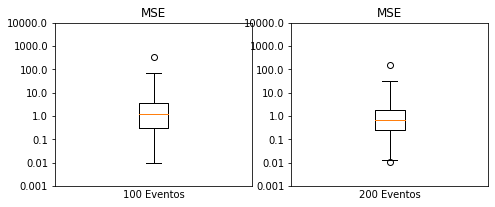

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

#values = MSE.iloc[:, [0]].to_numpy()
values = MSEX

fig = plt.figure(figsize=(12, 3))

ax = plt.subplot(1, 3, 1)
ax.boxplot(np.log10(values))
ax.set_xticks(np.arange(100, 100))
ax.set_xlabel("100 Eventos")
ax.set_yticks(np.arange(-3, 5))
ax.set_yticklabels(10.0**np.arange(-3, 5))
ax.set_title('MSE')

#values = MSE.iloc[:, [1]].to_numpy()
values = MSEXY
ax = plt.subplot(1, 3, 2)
ax.boxplot(np.log10(values))
ax.set_xticks(np.arange(100, 100))
ax.set_xlabel("200 Eventos")
ax.set_yticks(np.arange(-3, 5))
ax.set_yticklabels(10.0**np.arange(-3, 5))
ax.set_title('MSE')

In [57]:
y_train

,bus_0115.1,bus_0115.2,bus_0115.3,bus_0116.1,bus_0116.2,bus_0116.3,bus_0133.1,bus_0133.2,bus_0133.3,bus_0121.1,bus_0121.2,bus_0121.3,bus_0122.1,bus_0122.2,bus_0122.3,bus_0130.1,bus_0130.2,bus_0130.3,bus_0123.1,bus_0123.2,bus_0123.3,bus_0124.1,bus_0124.2,bus_0124.3,bus_0131.1,bus_0131.2,bus_0131.3,bus_0125.1,bus_0125.2,bus_0125.3,bus_0126.1,bus_0126.2,bus_0126.3,bus_0162.1,bus_0162.2,bus_0162.3,bus_0127.1,bus_0127.2,bus_0127.3,bus_0128.1,...,bus_0154.3,bus_0158.1,bus_0158.2,bus_0158.3,bus_0156.1,bus_0156.2,bus_0156.3,bus_0157.1,bus_0157.2,bus_0157.3,bus_0159.1,bus_0159.2,bus_0159.3,bus_0160.1,bus_0160.2,bus_0160.3,bus_0161.1,bus_0161.2,bus_0161.3,bus_0170.1,bus_0170.2,bus_0170.3,bus_0171.1,bus_0171.2,bus_0171.3,bus_0174.1,bus_0174.2,bus_0174.3,bus_0137.1,bus_0137.2,bus_0137.3,bus_0172.1,bus_0172.2,bus_0172.3,bus_0173.1,bus_0173.2,bus_0173.3,bus_0132.1,bus_0132.2,bus_0132.3
591,6580.453765,6580.533144,6580.546078,6580.182009,6580.321467,6580.376212,6579.777186,6580.006143,6580.123184,6579.631451,6579.889915,6580.026402,6579.281320,6579.592788,6579.761212,6578.944786,6579.307200,6579.506325,6579.240171,6579.548482,6579.710124,6578.967173,6579.312027,6579.491668,6578.513051,6578.918693,6579.128276,6578.089537,6578.580285,6578.852205,6577.774766,6578.312764,6578.608418,6577.519173,6578.094840,6578.407940,6578.231258,6578.700731,6578.961967,6578.195672,...,6577.137234,6576.070073,6576.859309,6577.271345,6576.195959,6576.966644,6577.370085,6576.195896,6576.966591,6577.370036,6575.657027,6576.504004,6576.941950,6573.712137,6574.766109,6575.284408,6573.813021,6574.853631,6575.368198,6579.777186,6580.006143,6580.123184,6579.777186,6580.006143,6580.123184,6578.498643,6578.928219,6579.168348,6573.548170,6574.604049,6575.127089,6572.981103,6574.102792,6574.626479,6578.330761,6578.760805,6578.982409,6577.778971,6578.263869,6578.502722
664,6580.448988,6580.486780,6580.454806,6580.169835,6580.264327,6580.273389,6579.753997,6579.932954,6580.003158,6579.613112,6579.813905,6579.906950,6579.271277,6579.508470,6579.642769,6578.942717,6579.214897,6579.388850,6579.158861,6579.426155,6579.524534,6578.875275,6579.181473,6579.288251,6578.403539,6578.774454,6578.895207,6578.101369,6578.465784,6578.736181,6577.808110,6578.205724,6578.505166,6577.561089,6577.986328,6578.309690,6578.233404,6578.582872,6578.840192,6578.158749,...,6577.070681,6576.160594,6576.742457,6577.201448,6576.282261,6576.850515,6577.297727,6576.282198,6576.850462,6577.297678,6575.761232,6576.384667,6576.880068,6573.820252,6574.587916,6575.224338,6573.955689,6574.713705,6575.337467,6579.753997,6579.932955,6580.003158,6579.753997,6579.932955,6580.003158,6578.516478,6578.832221,6579.058463,6573.777946,6574.546192,6575.174569,6572.835702,6573.641846,6574.342172,6578.214180,6578.611073,6578.737438,6577.642828,6578.094833,6578.221480
195,6580.030636,6580.066576,6580.089611,6579.679101,6579.783851,6579.861481,6579.155448,6579.362700,6579.521675,6578.964820,6579.205534,6579.391305,6578.509469,6578.809095,6579.041180,6578.071807,6578.428056,6578.704662,6578.476370,6578.771259,6578.988642,6578.125180,6578.460295,6578.702701,6577.540996,6577.943026,6578.227061,6576.960631,6577.462400,6577.845970,6576.545650,6577.102266,6577.522868,6576.220342,6576.820210,6577.267758,6577.147472,6577.624547,6577.991444,6577.115246,...,6575.650872,6574.376070,6575.221146,6575.821504,6574.536252,6575.360031,6575.947116,6574.536189,6575.359978,6575.947067,6573.850577,6574.761759,6575.402935,6571.472047,6572.620386,6573.394093,6571.529878,6572.669377,6573.439188,6579.155448,6579.362700,6579.521675,6579.155448,6579.362700,6579.521675,6577.488711,6577.918090,6578.254836,6571.042873,6572.210520,6572.997853,6571.050728,6572.249053,6573.034863,6577.306502,6577.735392,6578.036139,6576.597728,6577.083752,6577.412325
1240,6580.129085,6580.090530,6580.101031,6579.788281,6579.808679,6579.875218,6579.280613,6579.388831,6579.538863,6579.129273,6579.261845,6579.433381,6578.766864,6578.940830,6579.150516,6578.418529,6578.632281,65

#MinMaxScalerX

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
X =  pd.read_csv("/content/Linear/X_DF.csv")
y =  pd.read_csv("/content/Linear/Y_Vmag_DF.csv")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [60]:
scalerX = MinMaxScaler()

In [61]:
scalerX.fit_transform(X_train)

array([[0.52352422, 0.52706854, 0.53104243, ..., 0.4368889 , 0.53368103,
        0.41498061],
       [0.35370663, 0.35442905, 0.3629213 , ..., 0.46540669, 0.52444766,
        0.37326091],
       [0.76512103, 0.76615548, 0.76986573, ..., 0.81281443, 0.19465141,
        0.23806142],
       ...,
       [0.75402784, 0.76123657, 0.75737775, ..., 0.70127773, 0.26316468,
        0.36823256],
       [0.63165945, 0.63407372, 0.64725065, ..., 0.74759539, 0.20685194,
        0.37667524],
       [0.32137167, 0.3139355 , 0.31648889, ..., 0.66304514, 0.3211694 ,
        0.33288653]])

In [62]:
X_train = scalerX.transform(X_train)
X_test = scalerX.transform(X_test)

In [63]:
H = np.zeros((y_train.shape[1], X_train.shape[1]+1)) # Pre-allocate matrix

In [64]:
for i in range(y_train.shape[1]):
  ytreino=y_train.iloc[:, [i]].to_numpy()
  #ytreino=y_train[:, [i]] ##Cuando se escala
  biass = np.ones((X_train.shape[0],1))
  phi = np.hstack((biass, X_train))
  w = np.linalg.lstsq(np.matmul(phi.T,phi), np.matmul(phi.T,ytreino),rcond=None)
  row=w[0]
  H[i,:] = row.T

In [65]:
#YPredictions = np.zeros((y_test.shape[1], y_test.shape[0])) # Pre-allocate matrix
MSE=[]
from sklearn.metrics import mean_squared_error
for i in range(X_test.shape[0]):
  #xTeste=X_test.iloc[[i],:].to_numpy()
  xTeste=X_test[[i],:] #Cuando se escala
  xTeste=np.vstack((1,xTeste.T))
  y_pred=np.matmul(H,xTeste)
  y_true = y_test.iloc[[i],:].to_numpy()
  #y_true = y_test[[i],:]
  MSE.append(mean_squared_error(y_true.T, y_pred))

In [66]:
MSEX_MinMax = MSE

In [67]:
np.max(MSEX_MinMax)

39.913033284692375

In [68]:
np.max(MSEX)

337.54654837209637

In [69]:
np.max(MSEXY)

149.5804411143448

In [70]:
np.min(MSEX_MinMax)

0.012468784491178388

In [71]:
np.mean(MSEX_MinMax)

2.706191005369904

#MinMaxScalerXY

In [72]:
from sklearn.preprocessing import MinMaxScaler
X =  pd.read_csv("/content/Linear/X_DF.csv")
y =  pd.read_csv("/content/Linear/Y_Vmag_DF.csv")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [73]:
scalerX = MinMaxScaler()
scalery = MinMaxScaler()
scalerX.fit_transform(X_train)
scalery.fit_transform(y_train)

array([[0.59030148, 0.64911535, 0.6535815 , ..., 0.55545198, 0.61233578,
        0.59809902],
       [0.58764921, 0.62276393, 0.60252444, ..., 0.52866624, 0.57540073,
        0.53256079],
       [0.35537338, 0.38393703, 0.39823634, ..., 0.32304589, 0.35447542,
        0.34400221],
       ...,
       [0.50375881, 0.47388275, 0.47561403, ..., 0.5279615 , 0.49713716,
        0.4988134 ],
       [0.31371828, 0.32884879, 0.30612755, ..., 0.30738777, 0.30639404,
        0.28479358],
       [0.78024485, 0.8399568 , 0.80587946, ..., 0.7229823 , 0.77578031,
        0.72188673]])

In [74]:
X_train = scalerX.transform(X_train)
X_test = scalerX.transform(X_test)
y_train = scalery.transform(y_train)
y_test = scalery.transform(y_test)

In [75]:
H = np.zeros((y_train.shape[1], X_train.shape[1]+1)) # Pre-allocate matrix

In [76]:
for i in range(y_train.shape[1]):
  #ytreino=y_train.iloc[:, [i]].to_numpy()
  ytreino=y_train[:, [i]] ##Cuando se escala
  biass = np.ones((X_train.shape[0],1))
  phi = np.hstack((biass, X_train))
  w = np.linalg.lstsq(np.matmul(phi.T,phi), np.matmul(phi.T,ytreino),rcond=None)
  row=w[0]
  H[i,:] = row.T

In [77]:
#YPredictions = np.zeros((y_test.shape[1], y_test.shape[0])) # Pre-allocate matrix
MSE=[]
from sklearn.metrics import mean_squared_error
for i in range(X_test.shape[0]):
  #xTeste=X_test.iloc[[i],:].to_numpy()
  xTeste=X_test[[i],:] #Cuando se escala
  xTeste=np.vstack((1,xTeste.T))
  y_pred=np.matmul(H,xTeste)
  #y_true = y_test.iloc[[i],:].to_numpy()
  y_true = y_test[[i],:]
  MSE.append(mean_squared_error(y_true.T, y_pred))

In [78]:
MSEXY_MinMax = MSE

In [79]:
np.max(MSEXY_MinMax)

0.6455292418939399

In [80]:
np.max(MSEX_MinMax)

39.913033284692375

In [81]:
np.max(MSEX)

337.54654837209637

In [82]:
np.max(MSEXY)

149.5804411143448

In [83]:
y_test = scalery.inverse_transform(y_test)

In [84]:
Y_Pred = np.zeros((y_test.shape[1], y_test.shape[0])) # Pre-allocate matrix

In [85]:
Y_Pred.shape

(156, 495)

In [86]:
y_test.shape

(495, 156)

In [87]:
from sklearn.metrics import mean_squared_error
for i in range(X_test.shape[0]):
  #xTeste=X_test.iloc[[i],:].to_numpy()
  xTeste=X_test[[i],:] #Cuando se escala
  xTeste=np.vstack((1,xTeste.T))
  y_pred=np.matmul(H,xTeste)
  Y_Pred[:,[i]]=y_pred
  #y_true = y_test.iloc[[i],:].to_numpy()

In [88]:
Ypredicido = scalery.inverse_transform(Y_Pred.T)

In [89]:
#YPredictions = np.zeros((y_test.shape[1], y_test.shape[0])) # Pre-allocate matrix
MSE=[]
from sklearn.metrics import mean_squared_error
for i in range(X_test.shape[0]):
  y_pred = Ypredicido[[i],:]
  y_true = y_test[[i],:]
  MSE.append(mean_squared_error(y_true.T, y_pred.T))

In [90]:
np.max(MSE)

39.86835892643647

In [91]:
np.max(MSEX_MinMax)

39.913033284692375

In [92]:
MSEXY_MinMaxProof = MSE

In [96]:
np.max(MSE_Raw)

27.870505883848626

In [97]:
np.max(MSEXY_MinMaxProof)

39.86835892643647

In [98]:
np.min(MSE_Raw)

0.0071578550626425815

In [99]:
np.min(MSEXY_MinMaxProof)

0.012502602624194465

In [100]:
np.mean(MSE_Raw)

2.167625965115265

In [101]:
np.mean(MSEXY_MinMaxProof)

2.7062618364023696

Text(0.5, 1.0, 'MSE')

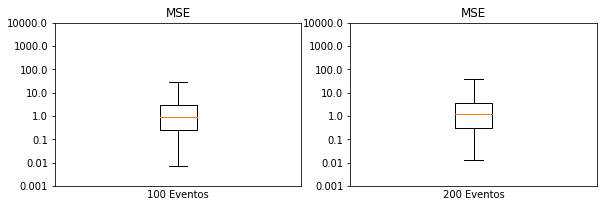

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

#values = MSE.iloc[:, [0]].to_numpy()
values = MSE_Raw

fig = plt.figure(figsize=(15, 3))

ax = plt.subplot(1, 3, 1)
ax.boxplot(np.log10(values))
ax.set_xticks(np.arange(100, 100))
ax.set_xlabel("100 Eventos")
ax.set_yticks(np.arange(-3, 5))
ax.set_yticklabels(10.0**np.arange(-3, 5))
ax.set_title('MSE')

#values = MSE.iloc[:, [1]].to_numpy()
values = MSEXY_MinMaxProof
ax = plt.subplot(1, 3, 2)
ax.boxplot(np.log10(values))
ax.set_xticks(np.arange(100, 100))
ax.set_xlabel("200 Eventos")
ax.set_yticks(np.arange(-3, 5))
ax.set_yticklabels(10.0**np.arange(-3, 5))
ax.set_title('MSE')

In [253]:
X_train

array([[0.52352422, 0.52706854, 0.53104243, ..., 0.4368889 , 0.53368103,
        0.41498061],
       [0.35370663, 0.35442905, 0.3629213 , ..., 0.46540669, 0.52444766,
        0.37326091],
       [0.76512103, 0.76615548, 0.76986573, ..., 0.81281443, 0.19465141,
        0.23806142],
       ...,
       [0.75402784, 0.76123657, 0.75737775, ..., 0.70127773, 0.26316468,
        0.36823256],
       [0.63165945, 0.63407372, 0.64725065, ..., 0.74759539, 0.20685194,
        0.37667524],
       [0.32137167, 0.3139355 , 0.31648889, ..., 0.66304514, 0.3211694 ,
        0.33288653]])

In [106]:

data_1 = np.random.normal(100, 10, 200)

In [108]:
data_1.shape

(200,)

In [109]:
data_2.shape

(495, 1)

In [142]:
MSE.shape

(495, 10)

In [146]:
MSEaux=MSE

In [150]:
MSE=MSEaux

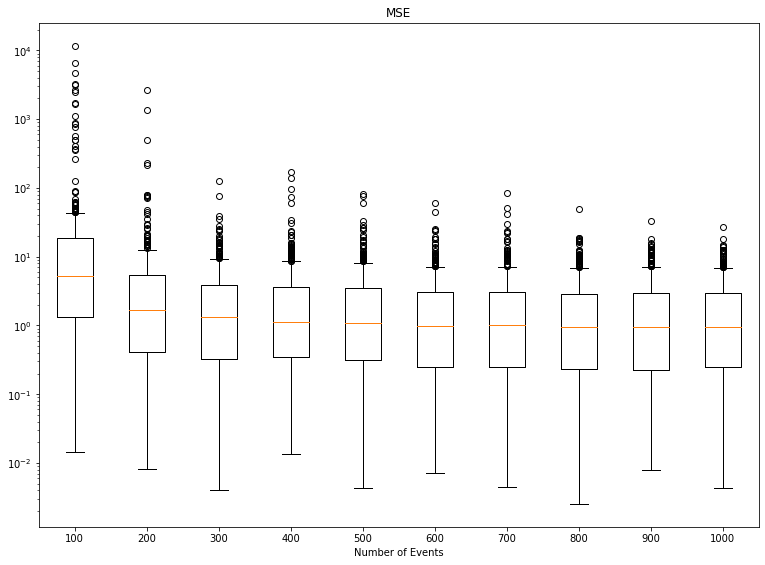

In [151]:
# Creating dataset
data_1 = MSE.iloc[:, [0]].to_numpy().reshape(MSE.shape[0])
data_2 = MSE.iloc[:, [1]].to_numpy().reshape(MSE.shape[0])
data_3 = MSE.iloc[:, [2]].to_numpy().reshape(MSE.shape[0])
data_4 = MSE.iloc[:, [3]].to_numpy().reshape(MSE.shape[0])
data_5 = MSE.iloc[:, [4]].to_numpy().reshape(MSE.shape[0])
data_6 = MSE.iloc[:, [5]].to_numpy().reshape(MSE.shape[0])
data_7 = MSE.iloc[:, [6]].to_numpy().reshape(MSE.shape[0])
data_8 = MSE.iloc[:, [7]].to_numpy().reshape(MSE.shape[0])
data_9 = MSE.iloc[:, [8]].to_numpy().reshape(MSE.shape[0])
data_10 = MSE.iloc[:, [9]].to_numpy().reshape(MSE.shape[0])
data = [data_1, data_2, data_3, data_4, data_5, data_6, data_7, data_8, data_9, data_10]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticks([1, 2, 3, 4])  # Set label locations.
ax.set_yscale('log')
ax.set_title('MSE')
ax.set_xlabel("Number of Events")
# Creating plot
bp = ax.boxplot(data)

plt.setp(ax, xticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
         xticklabels=['100', '200', '300', '400', '500', '600', '700', '800', '900', '1000'])

 
# show plot
plt.show()

In [ ]:
from sklearn.metrics import explained_variance_score

In [ ]:
explained_variance_score(yteste, y_pred)

0.9999801725177312

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scalerY = MinMaxScaler()
scalerY.fit_transform(y_train)
y_train = scalerY.transform(y_train)
y_test = scalerY.transform(y_test)
scaler = MinMaxScaler()
scaler.fit_transform(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
y_train=y_train.iloc[:, [0]].to_numpy()

In [ ]:
y_test=y_test.iloc[:, [0]].to_numpy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scalerY = MinMaxScaler()

In [ ]:
scalerY.fit_transform(y_train)

array([[0.50548551],
       [0.67226647],
       [0.27485488],
       ...,
       [0.26748226],
       [0.38844344],
       [0.66288201]])

In [ ]:
y_train = scalerY.transform(y_train)

In [ ]:
y_test = scalerY.transform(y_test)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit_transform(X_train)

array([[0.52352422, 0.52706854, 0.53104243, ..., 0.4368889 , 0.53368103,
        0.41498061],
       [0.35370663, 0.35442905, 0.3629213 , ..., 0.46540669, 0.52444766,
        0.37326091],
       [0.76512103, 0.76615548, 0.76986573, ..., 0.81281443, 0.19465141,
        0.23806142],
       ...,
       [0.75402784, 0.76123657, 0.75737775, ..., 0.70127773, 0.26316468,
        0.36823256],
       [0.63165945, 0.63407372, 0.64725065, ..., 0.74759539, 0.20685194,
        0.37667524],
       [0.32137167, 0.3139355 , 0.31648889, ..., 0.66304514, 0.3211694 ,
        0.33288653]])

In [ ]:
X_train = scaler.transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.coef_.shape

(1, 689)

In [ ]:
reg.score(X_train, y_train)

0.9999999999994932

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
from sklearn.metrics import explained_variance_score

In [ ]:
y_true=y_test

In [ ]:
explained_variance_score(y_test, y_pred)

0.9999999999828041

In [ ]:
from sklearn.metrics import max_error

In [ ]:
max_error(y_true, y_pred)

1.0533622116781771e-05

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(y_true, y_pred)

6.99322646885941e-07

1.6276145938777176e-12

In [ ]:
X_train.iloc[[0],:]

,Vsource.source.bus_0115.1.2.3.1,Vsource.source.bus_0115.1.2.3.2,Vsource.source.bus_0115.1.2.3.3,Line.line_0115_0116.bus_0115.1,Line.line_0115_0116.bus_0115.2,Line.line_0115_0116.bus_0115.3,Line.line_0116_0133.bus_0116.1,Line.line_0116_0133.bus_0116.2,Line.line_0116_0133.bus_0116.3,Line.line_0121_0122.bus_0121.1,Line.line_0121_0122.bus_0121.2,Line.line_0121_0122.bus_0121.3,Line.line_0121_0133.bus_0121.1,Line.line_0121_0133.bus_0121.2,Line.line_0121_0133.bus_0121.3,Line.line_0122_0130.bus_0122.1,Line.line_0122_0130.bus_0122.2,Line.line_0122_0130.bus_0122.3,Line.line_0123_0124.bus_0123.1,Line.line_0123_0124.bus_0123.2,Line.line_0123_0124.bus_0123.3,Line.line_0124_0131.bus_0124.1,Line.line_0124_0131.bus_0124.2,Line.line_0124_0131.bus_0124.3,Line.line_0125_0126.bus_0125.1,Line.line_0125_0126.bus_0125.2,Line.line_0125_0126.bus_0125.3,Line.line_0126_0162.bus_0126.1,Line.line_0126_0162.bus_0126.2,Line.line_0126_0162.bus_0126.3,Line.line_0127_0125.bus_0127.1,Line.line_0127_0125.bus_0127.2,Line.line_0127_0125.bus_0127.3,Line.line_0127_0128.bus_0127.1,Line.line_0127_0128.bus_0127.2,Line.line_0127_0128.bus_0127.3,Line.line_0129_0127.bus_0129.1,Line.line_0129_0127.bus_0129.2,Line.line_0129_0127.bus_0129.3,Line.line_0130_0129.bus_0130.1,...,Transformer.tr__ginasio_multidisciplinar_2.bus_0137.3.2,Transformer.tr__biblioteca_bora.bus_0172.1.2,Transformer.tr__biblioteca_bora.bus_0172.2.2,Transformer.tr__biblioteca_bora.bus_0172.3.2,Transformer.tr__eletroposto.bus_0174.1.2,Transformer.tr__eletroposto.bus_0174.2.2,Transformer.tr__eletroposto.bus_0174.3.2,Transformer.tr_armazenamento_energia.bus_0171.1.2,Transformer.tr_armazenamento_energia.bus_0171.2.2,Transformer.tr_armazenamento_energia.bus_0171.3.2,Load.transformer_tr__ginasio_multidisciplinar_2.bus_0137_bt.1.2.3.4.1.2,Load.transformer_tr__ginasio_multidisciplinar_2.bus_0137_bt.1.2.3.4.2.2,Load.transformer_tr__ginasio_multidisciplinar_2.bus_0137_bt.1.2.3.4.3.2,Load.transformer_tr__biblioteca_central_2.bus_0132_bt.1.2.3.4.1.2,Load.transformer_tr__biblioteca_central_2.bus_0132_bt.1.2.3.4.2.2,Load.transformer_tr__biblioteca_central_2.bus_0132_bt.1.2.3.4.3.2,Load.transformer_tr__fef_1_quadras_e_vestiarios.bus_0128_bt.1.2.3.4.1.2,Load.transformer_tr__fef_1_quadras_e_vestiarios.bus_0128_bt.1.2.3.4.2.2,Load.transformer_tr__fef_1_quadras_e_vestiarios.bus_0128_bt.1.2.3.4.3.2,Load.transformer_tr__iluminacao_publica_1.bus_0126_bt.1.2.3.4.1.2,Load.transformer_tr__iluminacao_publica_1.bus_0126_bt.1.2.3.4.2.2,Load.transformer_tr__iluminacao_publica_1.bus_0126_bt.1.2.3.4.3.2,Load.transformer_tr__iluminacao_publica_2.bus_0123_bt.1.2.3.4.1.2,Load.transformer_tr__iluminacao_publica_2.bus_0123_bt.1.2.3.4.2.2,Load.transformer_tr__iluminacao_publica_2.bus_0123_bt.1.2.3.4.3.2,Load.transformer_tr__biblioteca_central_1.bus_0132_bt.1.2.3.4.1.2,Load.transformer_tr__biblioteca_central_1.bus_0132_bt.1.2.3.4.2.2,Load.transformer_tr__biblioteca_central_1.bus_0132_bt.1.2.3.4.3.2,Load.transformer_tr__ginasio_multidisciplinar_1.bus_0137_bt.1.2.3.4.1.2,Load.transformer_tr__ginasio_multidisciplinar_1.bus_0137_bt.1.2.3.4.2.2,Load.transformer_tr__ginasio_multidisciplinar_1.bus_0137_bt.1.2.3.4.3.2,Load.transformer_tr__biblioteca_bora.bus_0172_bt.1.2.3.4.1.2,Load.transformer_tr__biblioteca_bora.bus_0172_bt.1.2.3.4.2.2,Load.transformer_tr__biblioteca_bora.bus_0172_bt.1.2.3.4.3.2,Load.transformer_tr__eletroposto.bus_0174_bt.1.2.3.4.1.2,Load.transformer_tr__eletroposto.bus_0174_bt.1.2.3.4.2.2,Load.transformer_tr__eletroposto.bus_0174_bt.1.2.3.4.3.2,Generator.geracao_pv_gmu.bus_0137_bt2.1.2.3.4.1.2,Generator.geracao_pv_gmu.bus_0137_bt2.1.2.3.4.2.2,Generator.geracao_pv_gmu.bus_0137_bt2.1.2.3.4.3.2
591,65.997193,66.223097,66.58913,65.997193,66.223097,66.58913,65.997335,66.223185,66.589152,35.089937,35.465309,35.033252,35.089937,35.465309,35.033252,35.090171,35.465493,35.033347,29.886647,29.820909,30.602986,29.886766,29.820948,30.602965,26.508716,26.809393,26.384171,22.165108,22.418879,22.03781,26.508583,26.80928,26.384104,4.016133,4.088

In [ ]:
X_train.head(5)

,Vsource.source.bus_0115.1.2.3.1,Vsource.source.bus_0115.1.2.3.2,Vsource.source.bus_0115.1.2.3.3,Line.line_0115_0116.bus_0115.1,Line.line_0115_0116.bus_0115.2,Line.line_0115_0116.bus_0115.3,Line.line_0116_0133.bus_0116.1,Line.line_0116_0133.bus_0116.2,Line.line_0116_0133.bus_0116.3,Line.line_0121_0122.bus_0121.1,Line.line_0121_0122.bus_0121.2,Line.line_0121_0122.bus_0121.3,Line.line_0121_0133.bus_0121.1,Line.line_0121_0133.bus_0121.2,Line.line_0121_0133.bus_0121.3,Line.line_0122_0130.bus_0122.1,Line.line_0122_0130.bus_0122.2,Line.line_0122_0130.bus_0122.3,Line.line_0123_0124.bus_0123.1,Line.line_0123_0124.bus_0123.2,Line.line_0123_0124.bus_0123.3,Line.line_0124_0131.bus_0124.1,Line.line_0124_0131.bus_0124.2,Line.line_0124_0131.bus_0124.3,Line.line_0125_0126.bus_0125.1,Line.line_0125_0126.bus_0125.2,Line.line_0125_0126.bus_0125.3,Line.line_0126_0162.bus_0126.1,Line.line_0126_0162.bus_0126.2,Line.line_0126_0162.bus_0126.3,Line.line_0127_0125.bus_0127.1,Line.line_0127_0125.bus_0127.2,Line.line_0127_0125.bus_0127.3,Line.line_0127_0128.bus_0127.1,Line.line_0127_0128.bus_0127.2,Line.line_0127_0128.bus_0127.3,Line.line_0129_0127.bus_0129.1,Line.line_0129_0127.bus_0129.2,Line.line_0129_0127.bus_0129.3,Line.line_0130_0129.bus_0130.1,...,Transformer.tr__ginasio_multidisciplinar_2.bus_0137.3.2,Transformer.tr__biblioteca_bora.bus_0172.1.2,Transformer.tr__biblioteca_bora.bus_0172.2.2,Transformer.tr__biblioteca_bora.bus_0172.3.2,Transformer.tr__eletroposto.bus_0174.1.2,Transformer.tr__eletroposto.bus_0174.2.2,Transformer.tr__eletroposto.bus_0174.3.2,Transformer.tr_armazenamento_energia.bus_0171.1.2,Transformer.tr_armazenamento_energia.bus_0171.2.2,Transformer.tr_armazenamento_energia.bus_0171.3.2,Load.transformer_tr__ginasio_multidisciplinar_2.bus_0137_bt.1.2.3.4.1.2,Load.transformer_tr__ginasio_multidisciplinar_2.bus_0137_bt.1.2.3.4.2.2,Load.transformer_tr__ginasio_multidisciplinar_2.bus_0137_bt.1.2.3.4.3.2,Load.transformer_tr__biblioteca_central_2.bus_0132_bt.1.2.3.4.1.2,Load.transformer_tr__biblioteca_central_2.bus_0132_bt.1.2.3.4.2.2,Load.transformer_tr__biblioteca_central_2.bus_0132_bt.1.2.3.4.3.2,Load.transformer_tr__fef_1_quadras_e_vestiarios.bus_0128_bt.1.2.3.4.1.2,Load.transformer_tr__fef_1_quadras_e_vestiarios.bus_0128_bt.1.2.3.4.2.2,Load.transformer_tr__fef_1_quadras_e_vestiarios.bus_0128_bt.1.2.3.4.3.2,Load.transformer_tr__iluminacao_publica_1.bus_0126_bt.1.2.3.4.1.2,Load.transformer_tr__iluminacao_publica_1.bus_0126_bt.1.2.3.4.2.2,Load.transformer_tr__iluminacao_publica_1.bus_0126_bt.1.2.3.4.3.2,Load.transformer_tr__iluminacao_publica_2.bus_0123_bt.1.2.3.4.1.2,Load.transformer_tr__iluminacao_publica_2.bus_0123_bt.1.2.3.4.2.2,Load.transformer_tr__iluminacao_publica_2.bus_0123_bt.1.2.3.4.3.2,Load.transformer_tr__biblioteca_central_1.bus_0132_bt.1.2.3.4.1.2,Load.transformer_tr__biblioteca_central_1.bus_0132_bt.1.2.3.4.2.2,Load.transformer_tr__biblioteca_central_1.bus_0132_bt.1.2.3.4.3.2,Load.transformer_tr__ginasio_multidisciplinar_1.bus_0137_bt.1.2.3.4.1.2,Load.transformer_tr__ginasio_multidisciplinar_1.bus_0137_bt.1.2.3.4.2.2,Load.transformer_tr__ginasio_multidisciplinar_1.bus_0137_bt.1.2.3.4.3.2,Load.transformer_tr__biblioteca_bora.bus_0172_bt.1.2.3.4.1.2,Load.transformer_tr__biblioteca_bora.bus_0172_bt.1.2.3.4.2.2,Load.transformer_tr__biblioteca_bora.bus_0172_bt.1.2.3.4.3.2,Load.transformer_tr__eletroposto.bus_0174_bt.1.2.3.4.1.2,Load.transformer_tr__eletroposto.bus_0174_bt.1.2.3.4.2.2,Load.transformer_tr__eletroposto.bus_0174_bt.1.2.3.4.3.2,Generator.geracao_pv_gmu.bus_0137_bt2.1.2.3.4.1.2,Generator.geracao_pv_gmu.bus_0137_bt2.1.2.3.4.2.2,Generator.geracao_pv_gmu.bus_0137_bt2.1.2.3.4.3.2
591,65.997193,66.223097,66.589130,65.997193,66.223097,66.589130,65.997335,66.223185,66.589152,35.089937,35.465309,35.033252,35.089937,35.465309,35.033252,35.090171,35.465493,35.033347,29.886647,29.820909,30.602986,29.886766,29.820948,30.602965,26.508716,26.809393,26.384171,22.165108,22.418879,22.037810,26.508583,26.809280,26.384104,4.016133,4

In [ ]:
X_train.iloc[0:3,:]

,Vsource.source.bus_0115.1.2.3.1,Vsource.source.bus_0115.1.2.3.2,Vsource.source.bus_0115.1.2.3.3,Line.line_0115_0116.bus_0115.1,Line.line_0115_0116.bus_0115.2,Line.line_0115_0116.bus_0115.3,Line.line_0116_0133.bus_0116.1,Line.line_0116_0133.bus_0116.2,Line.line_0116_0133.bus_0116.3,Line.line_0121_0122.bus_0121.1,Line.line_0121_0122.bus_0121.2,Line.line_0121_0122.bus_0121.3,Line.line_0121_0133.bus_0121.1,Line.line_0121_0133.bus_0121.2,Line.line_0121_0133.bus_0121.3,Line.line_0122_0130.bus_0122.1,Line.line_0122_0130.bus_0122.2,Line.line_0122_0130.bus_0122.3,Line.line_0123_0124.bus_0123.1,Line.line_0123_0124.bus_0123.2,Line.line_0123_0124.bus_0123.3,Line.line_0124_0131.bus_0124.1,Line.line_0124_0131.bus_0124.2,Line.line_0124_0131.bus_0124.3,Line.line_0125_0126.bus_0125.1,Line.line_0125_0126.bus_0125.2,Line.line_0125_0126.bus_0125.3,Line.line_0126_0162.bus_0126.1,Line.line_0126_0162.bus_0126.2,Line.line_0126_0162.bus_0126.3,Line.line_0127_0125.bus_0127.1,Line.line_0127_0125.bus_0127.2,Line.line_0127_0125.bus_0127.3,Line.line_0127_0128.bus_0127.1,Line.line_0127_0128.bus_0127.2,Line.line_0127_0128.bus_0127.3,Line.line_0129_0127.bus_0129.1,Line.line_0129_0127.bus_0129.2,Line.line_0129_0127.bus_0129.3,Line.line_0130_0129.bus_0130.1,...,Transformer.tr__ginasio_multidisciplinar_2.bus_0137.3.2,Transformer.tr__biblioteca_bora.bus_0172.1.2,Transformer.tr__biblioteca_bora.bus_0172.2.2,Transformer.tr__biblioteca_bora.bus_0172.3.2,Transformer.tr__eletroposto.bus_0174.1.2,Transformer.tr__eletroposto.bus_0174.2.2,Transformer.tr__eletroposto.bus_0174.3.2,Transformer.tr_armazenamento_energia.bus_0171.1.2,Transformer.tr_armazenamento_energia.bus_0171.2.2,Transformer.tr_armazenamento_energia.bus_0171.3.2,Load.transformer_tr__ginasio_multidisciplinar_2.bus_0137_bt.1.2.3.4.1.2,Load.transformer_tr__ginasio_multidisciplinar_2.bus_0137_bt.1.2.3.4.2.2,Load.transformer_tr__ginasio_multidisciplinar_2.bus_0137_bt.1.2.3.4.3.2,Load.transformer_tr__biblioteca_central_2.bus_0132_bt.1.2.3.4.1.2,Load.transformer_tr__biblioteca_central_2.bus_0132_bt.1.2.3.4.2.2,Load.transformer_tr__biblioteca_central_2.bus_0132_bt.1.2.3.4.3.2,Load.transformer_tr__fef_1_quadras_e_vestiarios.bus_0128_bt.1.2.3.4.1.2,Load.transformer_tr__fef_1_quadras_e_vestiarios.bus_0128_bt.1.2.3.4.2.2,Load.transformer_tr__fef_1_quadras_e_vestiarios.bus_0128_bt.1.2.3.4.3.2,Load.transformer_tr__iluminacao_publica_1.bus_0126_bt.1.2.3.4.1.2,Load.transformer_tr__iluminacao_publica_1.bus_0126_bt.1.2.3.4.2.2,Load.transformer_tr__iluminacao_publica_1.bus_0126_bt.1.2.3.4.3.2,Load.transformer_tr__iluminacao_publica_2.bus_0123_bt.1.2.3.4.1.2,Load.transformer_tr__iluminacao_publica_2.bus_0123_bt.1.2.3.4.2.2,Load.transformer_tr__iluminacao_publica_2.bus_0123_bt.1.2.3.4.3.2,Load.transformer_tr__biblioteca_central_1.bus_0132_bt.1.2.3.4.1.2,Load.transformer_tr__biblioteca_central_1.bus_0132_bt.1.2.3.4.2.2,Load.transformer_tr__biblioteca_central_1.bus_0132_bt.1.2.3.4.3.2,Load.transformer_tr__ginasio_multidisciplinar_1.bus_0137_bt.1.2.3.4.1.2,Load.transformer_tr__ginasio_multidisciplinar_1.bus_0137_bt.1.2.3.4.2.2,Load.transformer_tr__ginasio_multidisciplinar_1.bus_0137_bt.1.2.3.4.3.2,Load.transformer_tr__biblioteca_bora.bus_0172_bt.1.2.3.4.1.2,Load.transformer_tr__biblioteca_bora.bus_0172_bt.1.2.3.4.2.2,Load.transformer_tr__biblioteca_bora.bus_0172_bt.1.2.3.4.3.2,Load.transformer_tr__eletroposto.bus_0174_bt.1.2.3.4.1.2,Load.transformer_tr__eletroposto.bus_0174_bt.1.2.3.4.2.2,Load.transformer_tr__eletroposto.bus_0174_bt.1.2.3.4.3.2,Generator.geracao_pv_gmu.bus_0137_bt2.1.2.3.4.1.2,Generator.geracao_pv_gmu.bus_0137_bt2.1.2.3.4.2.2,Generator.geracao_pv_gmu.bus_0137_bt2.1.2.3.4.3.2
591,65.997193,66.223097,66.589130,65.997193,66.223097,66.589130,65.997335,66.223185,66.589152,35.089937,35.465309,35.033252,35.089937,35.465309,35.033252,35.090171,35.465493,35.033347,29.886647,29.820909,30.602986,29.886766,29.820948,30.602965,26.508716,26.809393,26.384171,22.165108,22.418879,22.037810,26.508583,26.809280,26.384104,4.016133,4

In [ ]:
X_train.shape

(1005, 689)

In [ ]:
for i in range(100,X_train.shape[0],100):
  print(i)

100
200
300
400
500
600
700
800
900
1000


In [153]:
X

<module 'sklearn.datasets' from '/usr/local/lib/python3.7/dist-packages/sklearn/datasets/__init__.py'>

LLE: 0.31 sec
LTSA: 0.48 sec
Hessian LLE: 0.62 sec
Modified LLE: 0.53 sec
Isomap: 0.49 sec
MDS: 3.1 sec
SE: 0.21 sec
t-SNE: 8.4 sec


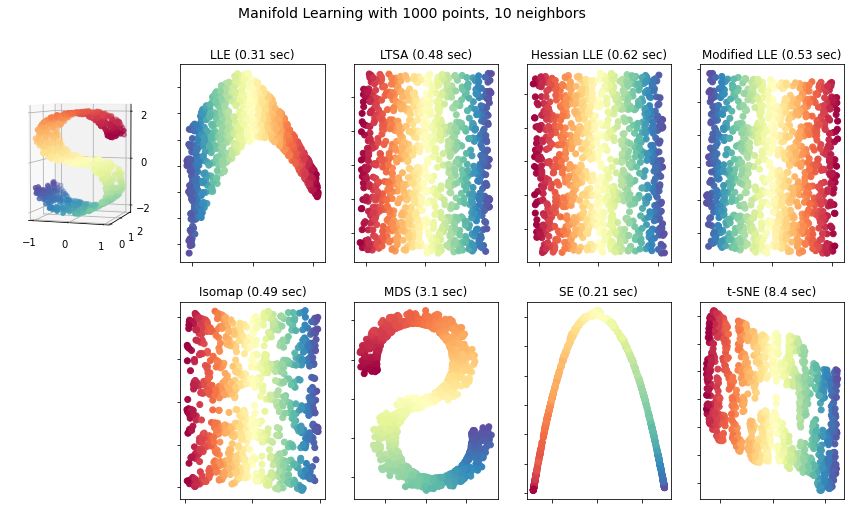

In [152]:
from collections import OrderedDict
from functools import partial
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 1000
X, color = datasets.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

# Create figure
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)

# Add 3d scatter plot
ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

# Set-up manifold methods
LLE = partial(manifold.LocallyLinearEmbedding,
              n_neighbors, n_components, eigen_solver='auto')

methods = OrderedDict()
methods['LLE'] = LLE(method='standard')
methods['LTSA'] = LLE(method='ltsa')
methods['Hessian LLE'] = LLE(method='hessian')
methods['Modified LLE'] = LLE(method='modified')
methods['Isomap'] = manifold.Isomap(n_neighbors, n_components)
methods['MDS'] = manifold.MDS(n_components, max_iter=100, n_init=1)
methods['SE'] = manifold.SpectralEmbedding(n_components=n_components,
                                           n_neighbors=n_neighbors)
methods['t-SNE'] = manifold.TSNE(n_components=n_components, init='pca',
                                 random_state=0)

# Plot results
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    Y = method.fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 5, 2 + i + (i > 3))
    ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

plt.show()

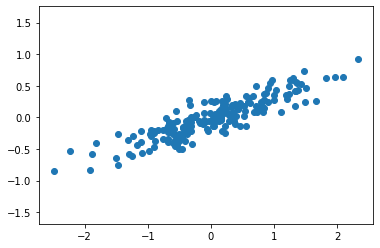

In [182]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [185]:
X

array([[-6.25301618e-01, -1.70063657e-01],
       [ 9.60695033e-01,  5.90900597e-01],
       [-5.98543385e-01, -4.02593393e-01],
       [-2.22805938e+00, -5.32576740e-01],
       [-4.61430060e-01, -4.98867244e-01],
       [-9.58929028e-01, -2.69331024e-01],
       [-6.73079909e-01, -3.38308547e-01],
       [ 1.30501861e+00,  5.91357846e-01],
       [ 3.74545597e-01, -9.85442049e-02],
       [-1.82628627e+00, -4.06170254e-01],
       [ 6.68262284e-01,  3.36877396e-01],
       [-5.82646676e-01, -1.77369217e-01],
       [-4.18128976e-01, -3.73811389e-01],
       [ 1.72209371e-01,  2.64668836e-01],
       [ 3.77116687e-01,  1.88442969e-01],
       [-6.79396230e-01, -1.31601978e-01],
       [ 1.03148960e+00,  4.25550018e-01],
       [ 3.36041799e-01,  3.90982721e-02],
       [ 7.05745985e-01,  4.88730649e-01],
       [ 8.39511547e-01,  1.52125872e-01],
       [ 1.49882898e+00,  4.71380809e-01],
       [ 2.88356638e-01,  3.31334714e-02],
       [-5.02935011e-01, -3.68665426e-01],
       [ 1.

In [186]:
X_train

,Vsource.source.bus_0115.1.2.3.1,Vsource.source.bus_0115.1.2.3.2,Vsource.source.bus_0115.1.2.3.3,Line.line_0115_0116.bus_0115.1,Line.line_0115_0116.bus_0115.2,Line.line_0115_0116.bus_0115.3,Line.line_0116_0133.bus_0116.1,Line.line_0116_0133.bus_0116.2,Line.line_0116_0133.bus_0116.3,Line.line_0121_0122.bus_0121.1,Line.line_0121_0122.bus_0121.2,Line.line_0121_0122.bus_0121.3,Line.line_0121_0133.bus_0121.1,Line.line_0121_0133.bus_0121.2,Line.line_0121_0133.bus_0121.3,Line.line_0122_0130.bus_0122.1,Line.line_0122_0130.bus_0122.2,Line.line_0122_0130.bus_0122.3,Line.line_0123_0124.bus_0123.1,Line.line_0123_0124.bus_0123.2,Line.line_0123_0124.bus_0123.3,Line.line_0124_0131.bus_0124.1,Line.line_0124_0131.bus_0124.2,Line.line_0124_0131.bus_0124.3,Line.line_0125_0126.bus_0125.1,Line.line_0125_0126.bus_0125.2,Line.line_0125_0126.bus_0125.3,Line.line_0126_0162.bus_0126.1,Line.line_0126_0162.bus_0126.2,Line.line_0126_0162.bus_0126.3,Line.line_0127_0125.bus_0127.1,Line.line_0127_0125.bus_0127.2,Line.line_0127_0125.bus_0127.3,Line.line_0127_0128.bus_0127.1,Line.line_0127_0128.bus_0127.2,Line.line_0127_0128.bus_0127.3,Line.line_0129_0127.bus_0129.1,Line.line_0129_0127.bus_0129.2,Line.line_0129_0127.bus_0129.3,Line.line_0130_0129.bus_0130.1,...,Transformer.tr__ginasio_multidisciplinar_2.bus_0137.3.2,Transformer.tr__biblioteca_bora.bus_0172.1.2,Transformer.tr__biblioteca_bora.bus_0172.2.2,Transformer.tr__biblioteca_bora.bus_0172.3.2,Transformer.tr__eletroposto.bus_0174.1.2,Transformer.tr__eletroposto.bus_0174.2.2,Transformer.tr__eletroposto.bus_0174.3.2,Transformer.tr_armazenamento_energia.bus_0171.1.2,Transformer.tr_armazenamento_energia.bus_0171.2.2,Transformer.tr_armazenamento_energia.bus_0171.3.2,Load.transformer_tr__ginasio_multidisciplinar_2.bus_0137_bt.1.2.3.4.1.2,Load.transformer_tr__ginasio_multidisciplinar_2.bus_0137_bt.1.2.3.4.2.2,Load.transformer_tr__ginasio_multidisciplinar_2.bus_0137_bt.1.2.3.4.3.2,Load.transformer_tr__biblioteca_central_2.bus_0132_bt.1.2.3.4.1.2,Load.transformer_tr__biblioteca_central_2.bus_0132_bt.1.2.3.4.2.2,Load.transformer_tr__biblioteca_central_2.bus_0132_bt.1.2.3.4.3.2,Load.transformer_tr__fef_1_quadras_e_vestiarios.bus_0128_bt.1.2.3.4.1.2,Load.transformer_tr__fef_1_quadras_e_vestiarios.bus_0128_bt.1.2.3.4.2.2,Load.transformer_tr__fef_1_quadras_e_vestiarios.bus_0128_bt.1.2.3.4.3.2,Load.transformer_tr__iluminacao_publica_1.bus_0126_bt.1.2.3.4.1.2,Load.transformer_tr__iluminacao_publica_1.bus_0126_bt.1.2.3.4.2.2,Load.transformer_tr__iluminacao_publica_1.bus_0126_bt.1.2.3.4.3.2,Load.transformer_tr__iluminacao_publica_2.bus_0123_bt.1.2.3.4.1.2,Load.transformer_tr__iluminacao_publica_2.bus_0123_bt.1.2.3.4.2.2,Load.transformer_tr__iluminacao_publica_2.bus_0123_bt.1.2.3.4.3.2,Load.transformer_tr__biblioteca_central_1.bus_0132_bt.1.2.3.4.1.2,Load.transformer_tr__biblioteca_central_1.bus_0132_bt.1.2.3.4.2.2,Load.transformer_tr__biblioteca_central_1.bus_0132_bt.1.2.3.4.3.2,Load.transformer_tr__ginasio_multidisciplinar_1.bus_0137_bt.1.2.3.4.1.2,Load.transformer_tr__ginasio_multidisciplinar_1.bus_0137_bt.1.2.3.4.2.2,Load.transformer_tr__ginasio_multidisciplinar_1.bus_0137_bt.1.2.3.4.3.2,Load.transformer_tr__biblioteca_bora.bus_0172_bt.1.2.3.4.1.2,Load.transformer_tr__biblioteca_bora.bus_0172_bt.1.2.3.4.2.2,Load.transformer_tr__biblioteca_bora.bus_0172_bt.1.2.3.4.3.2,Load.transformer_tr__eletroposto.bus_0174_bt.1.2.3.4.1.2,Load.transformer_tr__eletroposto.bus_0174_bt.1.2.3.4.2.2,Load.transformer_tr__eletroposto.bus_0174_bt.1.2.3.4.3.2,Generator.geracao_pv_gmu.bus_0137_bt2.1.2.3.4.1.2,Generator.geracao_pv_gmu.bus_0137_bt2.1.2.3.4.2.2,Generator.geracao_pv_gmu.bus_0137_bt2.1.2.3.4.3.2
591,65.997193,66.223097,66.589130,65.997193,66.223097,66.589130,65.997335,66.223185,66.589152,35.089937,35.465309,35.033252,35.089937,35.465309,35.033252,35.090171,35.465493,35.033347,29.886647,29.820909,30.602986,29.886766,29.820948,30.602965,26.508716,26.809393,26.384171,22.165108,22.418879,22.037810,26.508583,26.809280,26.384104,4.016133,4

In [187]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [189]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [221]:
X_train.T

,591,664,195,1240,1048,438,1435,643,96,584,1214,156,419,410,1222,477,514,1285,1453,1118,447,178,390,1289,1307,1366,1047,1142,634,865,787,744,859,294,544,1362,88,1031,1379,576,...,957,189,975,699,510,1082,474,856,747,252,21,1337,459,1184,276,955,1215,385,805,1437,343,769,1332,130,871,1123,1396,87,1482,330,1238,466,121,1044,1095,1130,1294,860,1459,1126
Vsource.source.bus_0115.1.2.3.1,65.997193,53.098560,84.347875,46.051347,47.466006,58.598531,60.997859,49.431681,49.866763,73.539953,26.232485,66.695056,84.181765,52.747889,64.519638,75.575522,81.415157,67.251694,67.872812,66.995759,65.848621,58.901225,71.325948,74.273612,71.856331,89.060471,80.331910,74.408447,84.157228,54.475045,67.235162,55.891230,65.877387,67.857282,44.410596,47.311363,70.398527,62.031897,42.481261,52.914582,...,66.181245,65.348108,65.580057,76.200847,59.867479,43.843692,60.459580,81.211289,59.095293,77.393215,91.623637,61.276971,63.402221,41.094230,48.858804,61.732243,47.557892,67.622025,55.525267,77.635383,63.002417,48.402399,81.455088,64.411817,76.600880,45.372548,57.896007,66.488359,76.831210,53.046229,60.713856,45.921708,80.380378,71.573269,74.235211,62.144677,53.384647,83.505282,74.210692,50.642531
Vsource.source.bus_0115.1.2.3.2,66.223097,53.074061,84.433083,46.255980,48.550506,57.465023,60.983973,49.651095,49.948160,74.318433,26.079076,66.890526,83.374755,53.653431,65.134867,76.148923,80.976020,67.742555,67.671370,66.400857,65.225185,59.400829,71.795165,74.247730,72.282952,88.652005,81.505964,74.767556,84.432009,53.053616,67.157989,56.132202,65.409466,67.221918,44.483161,48.610672,70.298011,62.967571,42.387142,51.837334,...,66.994805,65.379027,66.452330,76.089937,60.859743,43.816529,60.004255,81.015206,58.966136,77.025876,91.373535,61.296820,63.700029,41.726573,48.450970,61.894732,47.135990,67.158240,56.247175,78.229032,62.299105,48.825761,82.192793,63.942690,75.944008,46.336812,57.569997,66.921901,77.734511,52.099391,61.217725,46.313404,80.278251,71.321712,73.249212,63.474244,52.389960,84.058435,74.373115,49.989881
Vsource.source.bus_0115.1.2.3.3,66.589130,53.826272,84.719319,46.279017,47.997203,57.518716,62.050817,49.462752,49.053441,74.648642,26.275226,65.949651,83.613011,53.517610,65.541743,75.142524,81.379435,68.298776,67.666124,66.414586,66.246965,58.282230,70.697392,73.840388,71.634585,88.949435,80.250944,75.335175,84.330260,54.246308,66.669541,55.610830,65.932397,67.169660,43.880948,47.454159,70.063055,62.486133,42.188211,51.386067,...,66.786938,64.771583,66.259841,76.331718,59.753746,43.302723,60.124505,81.180118,58.283838,77.691352,91.305552,61.462524,64.405163,41.311752,49.469305,62.139681,46.399121,67.736150,56.191861,78.073248,62.045426,47.879762,82.071287,63.202113,75.692019,46.887871,57.449058,66.613647,77.996810,52.050007,61.333321,45.553908,79.727254,71.268878,72.961352,62.285324,53.549950,83.771298,75.411037,50.301372
Line.line_0115_0116.bus_0115.1,65.997193,53.098560,84.347875,46.051347,47.466006,58.598531,60.997859,49.431681,49.866763,73.539953,26.232485,66.695056,84.181765,52.747889,64.519638,75.575522,81.415157,67.251694,67.872812,66.995759,65.848621,58.901225,71.325948,74.273612,71.856331,89.060471,80.331910,74.408447,84.157228,54.475045,67.235162,55.891230,65.877387,67.857282,44.410596,47.311363,70.398527,62.031897,42.481261,52.914582,...,66.181245,65.348108,65.580057,76.200847,59.867479,43.843692,60.459580,81.211289,59.095293,77.393215,91.623637,61.276971,63.402221,41.094230,48.858804,61.732243,47.557892,67.622025,55.525267,77.635383,63.002417,48.402399,81.455088,64.411817,76.600880,45.372548,57.896007,66.488359,76.831210,53.046229,60.713856,45.921708,80.380378,71.573269,74.235211,62.144677,53.384647,83.505282,74.210692,50.642531
Line.line_0115_0116.bus_0115.2,66.223097,53.074061,84.433083,46.255980,48.550506,57.465023,60.983973,49.651095,49.948160,74.318433,26.079076,66.890526,83.374755,53.653431,65.134867,76.148923,80.976020,67.742555,67.671370,66.400857,65.225185,59.400829,71.795165,74.247730,72.282952,88.652005,81.505964,74.

In [222]:
DataX=X_train.T.to_numpy()

In [223]:
from sklearn.decomposition import PCA

In [224]:
pca = PCA(n_components=2)

In [225]:
projected = pca.fit_transform(DataX)

In [226]:
pca.components_.shape

(2, 1005)

In [227]:
print(DataX.shape)

(689, 1005)


In [228]:
print(projected.shape)

(689, 2)


In [232]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

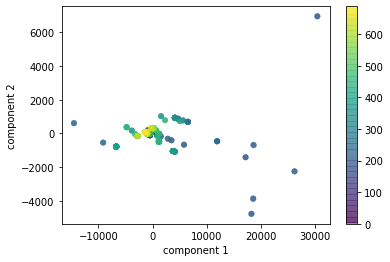

In [237]:
plt.scatter(projected[:, 0], projected[:, 1],c = [range(0,689,1)], edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [230]:
digits.target.shape

(1797,)

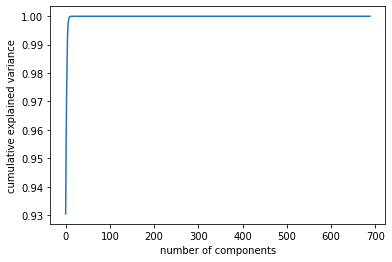

In [231]:
pca = PCA().fit(DataX)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');